In [1]:
import os
import warnings

os.environ["OMP_NUM_THREADS"] = "1"  #
warnings.filterwarnings("ignore", category=UserWarning)

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open("pkl/pv_cumulative_emotion.pkl", "rb") as f:
    p = pickle.load(f)
    e = [v['emotions'] for v in p.values()]

In [2]:
goemotion_labels = ['admiration', 'amusement', 'anger', 'annoyance', 'approval',
                    'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
                    'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
                    'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
                    'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
                    ]

sentiment_mapping = {"positive": ["amusement", "excitement", "joy", "love",
                                 "desire", "optimism", "caring", "pride",
                                 "admiration", "gratitude", "relief", "approval"],
                    "negative": ["fear", "nervousness", "remorse", "embarrassment",
                                 "disappointment", "sadness", "grief", "disgust",
                                 "anger", "annoyance", "disapproval"],
                    "ambiguous": ["realization", "surprise", "curiosity", "confusion", "neutral"]
                    }

def goemotion2sentiment(emotion):
    for key, value in sentiment_mapping.items():
        if emotion in value:
            return sentiment_labels.index(key)


polarity_mapping = dict()
for key, value in sentiment_mapping.items():
    if key == "positive":
        polarity_mapping.update({e:1 for e in value})
    elif key == "negative":
        polarity_mapping.update({e:-1 for e in value})
    elif key == "ambiguous":
        polarity_mapping.update({e:0 for e in value})

polarity_vector = np.array([polarity_mapping[i] for i in goemotion_labels])
sentiment_labels = [key for key in sentiment_mapping.keys()]

In [3]:
from sklearn.preprocessing import minmax_scale

e_art = []
e_pos = []
e_pred = []

for idx, item in enumerate(p.values()):
    length = len(item['emotions'])
    pos = np.linspace(0,1, length).tolist()
    art_id = np.array([idx] * length, dtype=int)
    e_pos.extend(pos)
    e_art.extend(art_id)
    e_pred.extend(item['emotions'])


e_arc = np.vstack([e_art, e_pos]).T

m_df = pd.DataFrame({
    "art": e_arc[:, 0].astype(int),
    "pos": e_arc[:, 1].astype(float)
})

m_df[goemotion_labels] = e_pred
df_goemotion = m_df[goemotion_labels]
df_norm = df_goemotion.apply(lambda row: minmax_scale(row.values, feature_range=(0,1)), axis=1, result_type='expand')
ge_result = df_norm.idxmax(axis=1).tolist()
m_df['ge_label'] = ge_result
m_df['st_label'] = [goemotion2sentiment(goemotion_labels[e]) for e in ge_result]

m_df["polarity"] = m_df[goemotion_labels].values @ polarity_vector

In [4]:
m_df

,art,pos,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,pride,realization,relief,remorse,sadness,surprise,neutral,ge_label,st_label,polarity
0,0,0.000000,0.000481,0.000285,0.000463,0.000350,0.000330,0.000365,0.001427,0.001266,...,0.000206,0.001364,0.000147,0.000251,0.000450,0.000402,0.998615,27,2,-0.000117
1,0,0.100000,0.000337,0.000300,0.000321,0.000352,0.007145,0.014177,0.000669,0.001269,...,0.000644,0.003329,0.000547,0.000286,0.001007,0.000301,0.998337,27,2,0.021435
2,0,0.200000,0.000394,0.000414,0.000648,0.000450,0.012344,0.260404,0.000918,0.002787,...,0.001832,0.011772,0.002545,0.000922,0.004581,0.000818,0.995466,27,2,0.269140
3,0,0.300000,0.000587,0.000798,0.001463,0.000444,0.011165,0.753046,0.000938,0.005576,...,0.004420,0.039560,0.006381,0.003323,0.035611,0.002021,0.972935,27,2,0.720000
4,0,0.400000,0.000432,0.000669,0.001318,0.000300,0.011376,0.574425,0.001179,0.003708,...,0.002959,0.102358,0.004512,0.002290,0.030149,0.001341,0.970134,27,2,0.547487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19478,616,0.897436,0.003378,0.011334,0.005895,0.006339,0.003659,0.003074,0.000892,0.001404,...,0.001318,0.076218,0.000920,0.002614,0.971794,0.002409,0.001760,25,1,-0.968434
19479,616,0.923077,0.003378,0.011334,0.005895,0.006339,0.003659,0.003074,0.000892,0.001404,...,0.001318,0.076218,0.000920,0.002614,0.971794,0.002409,0.001760,25,1,-0.968434
19480,616,0.948718,0.003378,0.011334,0.005895,0.006339,0.003659,0.003074,0.000892,0.001404,...,0.001318,0.076218,0.000920,0.002614,0.971794,0.002409,0.001760,25,1,-0.968434
19481,616,0.974359,0.003378,0.011334,0.005895,0.006339,0.003659,0.003074,0.000892,0.001404,...,0.001318,0.076218,0.000920,0.002614,0.971794,0.002409,0.001760,25,1,-0.968434


In [5]:
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks

def quick_arc_peak(y, prominence=0.1):
    y = np.array(y)
    length = len(y)
    x = np.linspace(0, 1, length)
    #
    peaks, peak_props = find_peaks(y, prominence=prominence)  # prominence 控制显著性
    troughs, trough_props = find_peaks(-y, prominence=prominence)
    return x[peaks], y[peaks], x[troughs], y[troughs]

def seg_centroid(y):
    y = np.array(y)
    x = np.linspace(0, 1, y.shape[0])
    centroid_x = np.sum(x * y) / np.sum(y)
    centroid_y = np.sum(y * y) / np.sum(y)
    return (centroid_x, centroid_y)

def y_flip(v_list):
    v_list = np.array(v_list)
    v_list = v_list * -1
    v_list = v_list - v_list.min()
    return v_list

def x_flip(v_list):
    v_list = np.array(v_list)
    v_list = v_list[::-1]
    return v_list

def arc_features(df,list_col = 'y_list'):
    df['start'] = df[list_col].apply(lambda y: y[0])
    df['end'] = df[list_col].apply(lambda y: y[-1])
    df['increase'] = df[list_col].apply(lambda y: y[-1] - y[0])
    df['max'] = df[list_col].apply(lambda y: max(y))
    df['min'] = df[list_col].apply(lambda y: min(y))
    df['mean'] = df[list_col].apply(lambda y: y.mean())
    df["var"] = df[list_col].apply(lambda y: np.var(y, ddof=1))
    df["std"] = df[list_col].apply(lambda y: np.std(y, ddof=1))
    df['skew'] = df[list_col].apply(lambda y: skew(y))
    df['kurt'] = df[list_col].apply(lambda y: kurtosis(y))
    df[['centroid_x','centroid_y']] = df[list_col].apply(lambda y: pd.Series(seg_centroid(y)))
    return df



In [6]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema
import seaborn as sns
#
def group_by_art(df,group_col = 'art', value_col = 'polarity'):
    name_list = []
    y_list = []
    for name, group in df.groupby(group_col):
        y = group[value_col].tolist()
        y_list.append(y)
        name_list.append(name)
    return pd.DataFrame({'art':name_list, 'y_origin':y_list})
#
def smooth_curves(df,y_col = 'y_origin', n_steps = 60, sigma=2, name_col = 'art'):
    x_new = np.linspace(0, 1, n_steps)
    name_list = []
    y_list = []
    y_origin = []
    for name, group in df.groupby(name_col):
        y = group[y_col].values[0]
        y_gauss = gaussian_filter1d(y, sigma)
        x = np.linspace(0, 1, len(y))
        y_origin_resampled = np.interp(x_new, x, y)
        y_resampled = np.interp(x_new, x, y_gauss)
        y_origin.append(y_origin_resampled)
        y_list.append(y_resampled)
        name_list.append(name)
    df_new = pd.DataFrame({"art": name_list,"y_origin": y_origin, "y_smoothed": y_list})
    return df_new
#
def get_smooth_MSE(df):
    mse_list = []
    for name, group in df.groupby('art'):
        y_origin = group["y_origin"].values[0]
        y_smoothed = group["y_smoothed"].values[0]
        mse = np.mean((y_origin - y_smoothed) ** 2)
        mse_list.append(mse)
    return mse_list

#
def get_smooth_meanLRV(df, segment=3):
    meanlrv_list = []
    for name, group in df.groupby('art'):
        y_origin = np.array(group["y_origin"].values[0])
        y_smoothed = np.array(group["y_smoothed"].values[0])
        x = [i for i in range(len(y_origin))]
        seg_lrv = []
        for part in np.array_split(x, segment):
            y_origin_seg = y_origin[part]
            y_smoothed_seg = y_smoothed[part]
            residual = y_origin_seg - y_smoothed_seg
            seg_lrv.append(np.var(residual))
        meanlrv_list.append(np.mean(seg_lrv))
    return meanlrv_list


#
def get_smooth_meanLER(df, segment=3, pos_tol=2, amp_tol=0.01):
    meanler_list = []
    for name, group in df.groupby('art'):
        y_origin = np.array(group["y_origin"].values[0])
        y_smoothed = np.array(group["y_smoothed"].values[0])
        x = [i for i in range(len(y_origin))]
        seg_ler = []
        for part in np.array_split(x, segment):
            y_origin_seg = y_origin[part]
            y_smoothed_seg = y_smoothed[part]
            local_max = argrelextrema(y_origin_seg, np.greater)[0]
            local_min = argrelextrema(y_origin_seg, np.less)[0]
            extrema_idx = np.sort(np.concatenate([local_max, local_min]))
            if len(extrema_idx) == 0:
                seg_ler.append(1.0)
                continue#
            count_preserved = 0
            for idx in extrema_idx:
                start = max(0, idx-pos_tol)
                end = min(len(y_smoothed_seg), idx+pos_tol+1)
                if np.any(np.abs(y_smoothed_seg[start:end] - y_origin_seg[idx]) <= amp_tol):
                    count_preserved += 1

            seg_ler.append(count_preserved / len(extrema_idx))
        meanler_list.append(np.mean(seg_ler))
    return meanler_list

In [7]:
y_origin_df = group_by_art(m_df, value_col = 'polarity')
y_smoothed_df = smooth_curves(y_origin_df, sigma=2)

MSE = get_smooth_MSE(y_smoothed_df)

meanLRV_result = []
meanLER_result = []
for i in [2,4,6]:
    meanLRV = get_smooth_meanLRV(y_smoothed_df, segment=i)
    meanLER = get_smooth_meanLER(y_smoothed_df, segment=i)
    meanLRV_result.append(meanLRV)
    meanLER_result.append(meanLER)

<Axes: >

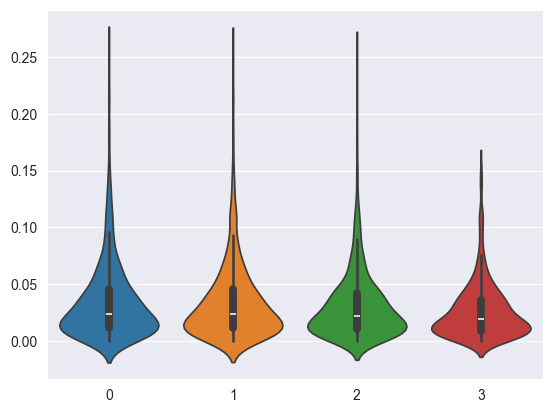

In [8]:
sns.violinplot([MSE] + meanLRV_result)

<Axes: >

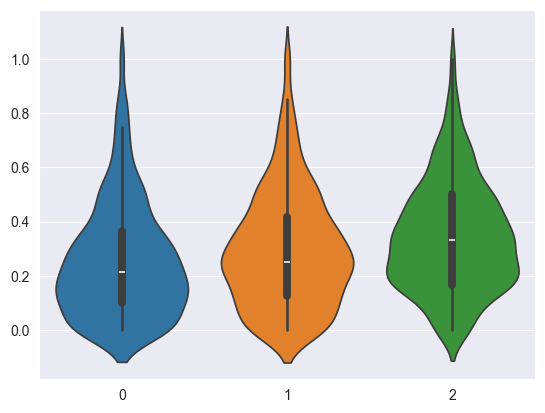

In [9]:
sns.violinplot(meanLER_result)

In [108]:
y_list_col = 'y_smoothed'
#
df_nv = arc_features(y_smoothed_df, y_list_col)
df_nv['y_sort'] = df_nv[y_list_col].apply(lambda y: np.array(y))
df_nv['origin_min'] = df_nv['min']
df_nv['origin_max'] = df_nv['max']
df_nv['horizontal_flip'] = 1
df_nv['vertical_flip'] = 1
#
df_nv['vertical_flip']  = np.where(df_nv["skew"] < 0, -df_nv['vertical_flip'], df_nv['vertical_flip'] )
df_nv["y_sort"] = np.where(df_nv["skew"] < 0, -df_nv["y_sort"], df_nv["y_sort"])
df_nv = arc_features(df_nv,'y_sort')
df_nv['y_sort'] = df_nv['y_sort'] - df_nv['min']
df_nv = arc_features(df_nv,'y_sort')

#
all_values = np.concatenate(df_nv["y_sort"].values)
min_val, max_val = all_values.min(), all_values.max()
df_nv["y_sort_norm"] = df_nv["y_sort"].apply(
    lambda arr: (np.array(arr) - min_val) / (max_val - min_val)
)

df_nv = arc_features(df_nv,'y_sort_norm')
df_nv['horizontal_flip'] = np.where(df_nv["centroid_x"] < 0.5, -df_nv['horizontal_flip'], df_nv['horizontal_flip'] )
df_nv["y_sort_norm"] = df_nv.apply(
    lambda row: row["y_sort_norm"][::-1] if row["centroid_x"] < 0.5 else row["y_sort_norm"],
    axis=1
)
df_nv = arc_features(df_nv,'y_sort_norm')
df_nv[['peaks_x','peaks_y','troughs_x','troughs_y']] = df_nv['y_sort_norm'].apply(lambda y: pd.Series(quick_arc_peak(y,0.1)))
#
df_nv['arc_type'] = 0

In [109]:
story_id = np.array([int(key) for key in p.keys()])
df_nv['Story number'] = story_id
hits_df = pd.read_excel(r'data\story_page_hits.xlsx', sheet_name='Story page hits')
valid_hits = hits_df[hits_df['Story number'] > 0]
df_nv = df_nv.merge(hits_df[['Story number', 'Story page hits']], on='Story number', how='left')
df_nv["Story page hits"] = df_nv["Story page hits"].fillna(0).astype("int64")
df_nv["Story page hits"] = df_nv["Story page hits"].astype("int64")
df_nv["Story number"] = df_nv["Story number"].astype("int64")

In [110]:
df_nv

,art,y_origin,y_smoothed,start,end,increase,max,min,mean,var,...,horizontal_flip,vertical_flip,y_sort_norm,peaks_x,peaks_y,troughs_x,troughs_y,arc_type,Story number,Story page hits
0,0,"[-0.00011709878162946552, 0.00353578626996072,...","[0.13127870096395775, 0.13637745996930345, 0.1...",0.013285,0.113818,0.100533,0.123151,0.0,0.057778,0.002549,...,-1,1,"[0.01328488733850567, 0.012296819767471072, 0....",[],[],[],[],0,1,6566
1,1,"[-1.0541391686056159, -0.8086158957539429, -0....","[-0.8883934601682809, -0.9060549368870446, -0....",0.016742,0.098927,0.082186,0.098927,0.0,0.032720,0.000567,...,-1,1,"[0.016741839270641694, 0.01758492037191313, 0....",[],[],[],[],0,27,3396
2,2,"[-0.03673151016118936, -0.08647366936004847, -...","[-0.04599396779805817, -0.04069373021491775, -...",0.000000,0.215615,0.215615,0.215631,0.0,0.110050,0.006732,...,1,1,"[0.0, 0.001066577209657425, 0.0021331544193148...",[],[],[],[],0,36,3772
3,3,"[0.002874526453524595, -0.0057095617510455315,...","[0.147189858351048, 0.1612828824792552, 0.1753...",0.029358,0.080378,0.051021,0.097746,0.0,0.035751,0.001166,...,-1,1,"[0.029357528035434788, 0.028233019086788064, 0...",[],[],[],[],0,45,4387
4,4,"[0.7859655623178696, 0.9895424586313805, 1.181...","[1.1899042534492346, 1.2474176768002103, 1.311...",0.172067,0.278346,0.106279,0.278346,0.0,0.085236,0.005297,...,1,-1,"[0.17206689686438245, 0.16049335782329213, 0.1...",[],[],[0.4576271186440678],[0.0],0,50,3642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,612,"[0.0004518726418609731, 0.5964360085583116, 1....","[1.0743630177917893, 1.0984168713141438, 1.122...",0.072048,0.186456,0.114409,0.213317,0.0,0.077648,0.005468,...,-1,1,"[0.07204758319641914, 0.06907625456813192, 0.0...",[],[],[],[],0,1405,0
613,613,"[1.5506880725370138, 1.6108719947116728, 1.671...","[1.7915230613996536, 1.815264700087778, 1.8390...",0.011502,0.062895,0.051392,0.166527,0.0,0.072207,0.003783,...,-1,1,"[0.011502402302076577, 0.010526134337442008, 0...",[0.711864406779661],[0.16652703694711138],[],[],0,1406,1731
614,614,"[-0.31478477813652717, 0.046217461775147795, 0...","[0.5623429975910741, 0.6025064502187278, 0.642...",0.020772,0.152338,0.131566,0.152338,0.0,0.049143,0.001260,...,-1,-1,"[0.020772080920644996, 0.022598096216432103, 0...",[],[],[],[],0,1407,1716
615,615,"[1.0066523692657938, 1.6118525657420524, 2.040...","[1.6983135810951073, 1.7573745102379985, 1.815...",0.040919,0.549036,0.508118,0.583659,0.0,0.184239,0.033751,...,-1,1,"[0.040918591254531164, 0.04307630254771551, 0....",[],[],[],[],0,1408,1558


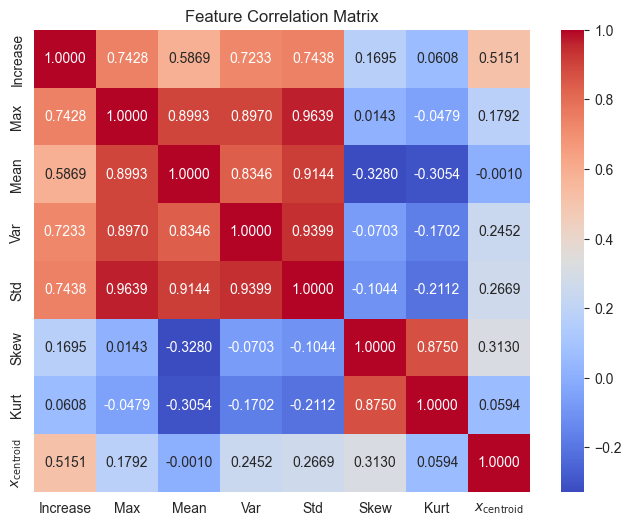

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['increase','max','mean','var','std','skew','kurt','centroid_x']
display_labels = ['Increase','Max','Mean','Var','Std','Skew','Kurt',r'$x_{\mathrm{centroid}}$']
corr_df = df_nv[features]
corr_matrix = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", xticklabels=display_labels, yticklabels=display_labels, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

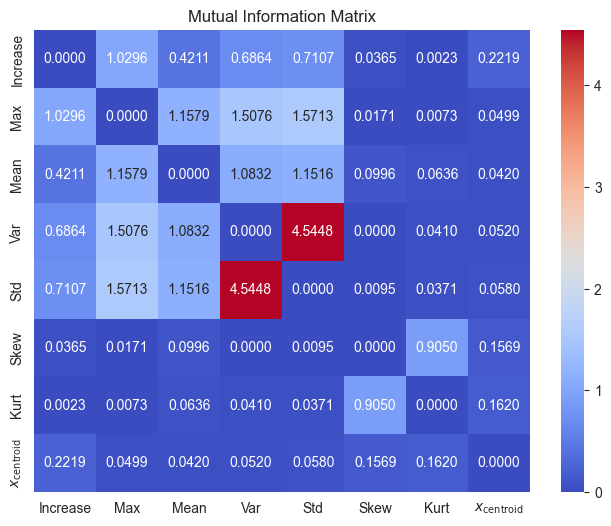

In [112]:
from sklearn.feature_selection import mutual_info_regression
X = corr_df
mi_matrix = pd.DataFrame(index=X.columns, columns=X.columns)
#
for col1 in X.columns:
    for col2 in X.columns:
        if col1 == col2:
            mi_matrix.loc[col1, col2] = 0
        else:
            mi_matrix.loc[col1, col2] = mutual_info_regression(
                X[[col1]], X[col2]
            )[0]

mi_matrix = mi_matrix.astype(float)
mi_values = mi_matrix.values
mi_df = pd.DataFrame(mi_values, index=features, columns=features)
#
plt.figure(figsize=(8,6))
sns.heatmap(mi_df, annot=True, fmt=".4f", xticklabels=display_labels, yticklabels=display_labels, cmap='coolwarm')
plt.title('Mutual Information Matrix')
plt.show()

In [113]:
stat_df = pd.DataFrame({"Std": corr_df.std().values, "Skew": corr_df.skew().values})
stat_df.index = display_labels
stat_df.T

,Increase,Max,Mean,Var,Std,Skew,Kurt,$x_{\mathrm{centroid}}$
Std,0.153521,0.154487,0.059178,0.011751,0.051958,0.572831,1.507913,0.091123
Skew,0.954697,1.066248,0.948270,2.892315,1.111694,1.040549,2.428763,-0.053500


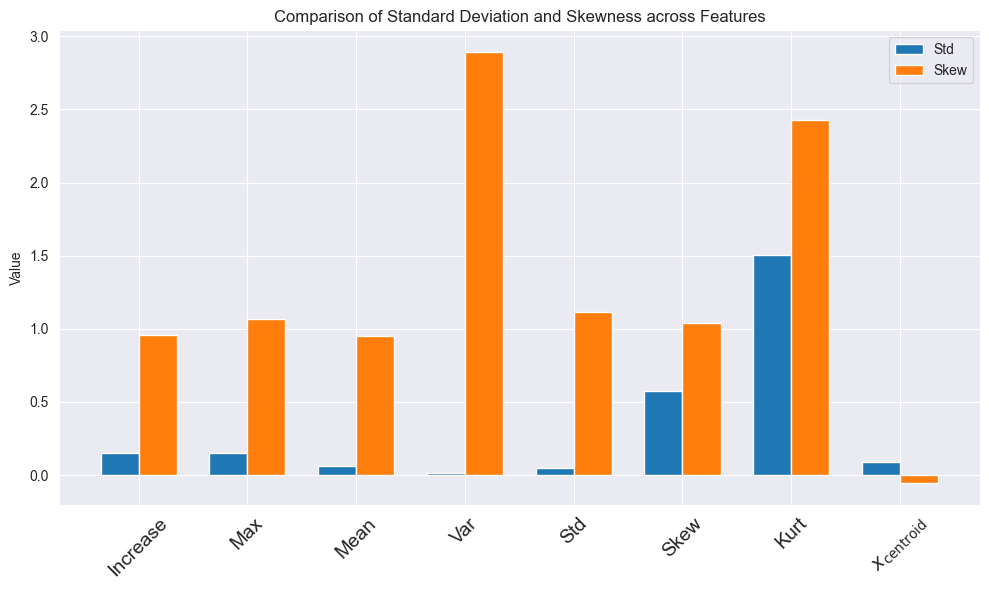

In [114]:
#
display_labels = ['Increase','Max','Mean','Var','Std','Skew','Kurt',r'$x_{\mathrm{centroid}}$']
std_values = corr_df.std().values
skew_values = corr_df.skew().values

x = np.arange(len(display_labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, std_values, width, label='Std')
plt.bar(x + width/2, skew_values, width, label='Skew')

plt.xticks(x, display_labels, fontsize=14, rotation=45)
plt.ylabel('Value')
plt.title('Comparison of Standard Deviation and Skewness across Features')
plt.legend()
plt.tight_layout()
plt.show()

In [115]:
from sklearn.manifold import MDS
#
def quick_mds(d_matrix, t_labels, legend_labels=None, random_seed=0):
    #
    embedding = MDS(n_components=2, dissimilarity="precomputed", random_state=random_seed)
    X_2d = embedding.fit_transform(d_matrix)
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=t_labels, cmap="tab20")
    #
    handles, _ = scatter.legend_elements()
    if legend_labels is None:
        legend_labels = sorted(set(t_labels))
    #
    plt.legend(handles, legend_labels, title="Groups")  #
    plt.title("MDS embedding of DTW distances")
    plt.show()

def quick_arc_plot(df, title = "Visualization of Clustered ETs",ft =14):
    plt.figure(figsize=(8, 5))
    for i in range(df.shape[0]):
        fy = df['y_sort_norm'].iloc[i]
        x = np.linspace(0, 1, len(fy))
        plt.plot(x,fy)
    plt.title(title, fontsize=ft)
    plt.ylim(0, 1)
    plt.show()

In [116]:
from tslearn.metrics import cdist_dtw
from scipy.stats import zscore
import numpy as np

df_test = df_nv.copy()

y_list = df_test['y_sort_norm'].tolist()
X = np.array(df_test['y_sort_norm'], dtype=object)  # tslearn
dist_matrix = cdist_dtw(X)  # N x N

In [117]:
#
y_list_origin = y_origin_df['y_origin'].tolist()
X_origin = np.array(y_origin_df['y_origin'], dtype=object)
dist_matrix_origin = cdist_dtw(X_origin)

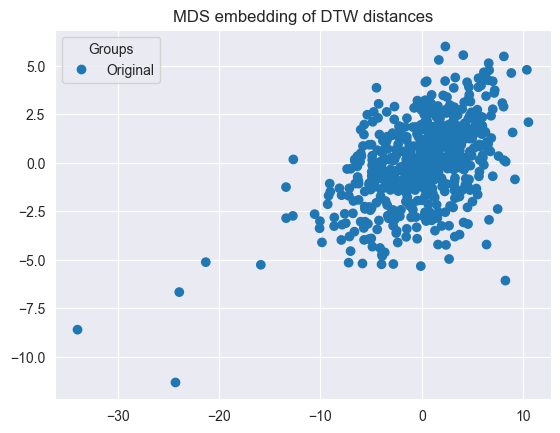

In [118]:
y_origin_df['arc_type'] = 0
quick_mds(dist_matrix_origin, y_origin_df['arc_type'].values,['Original'])

In [119]:
avg_dist = dist_matrix.mean(axis=1)

# z-score
z_scores = zscore(avg_dist)
threshold = 2
outliers = np.where(z_scores > threshold)[0]
df_nv.loc[outliers, 'arc_type'] = -1

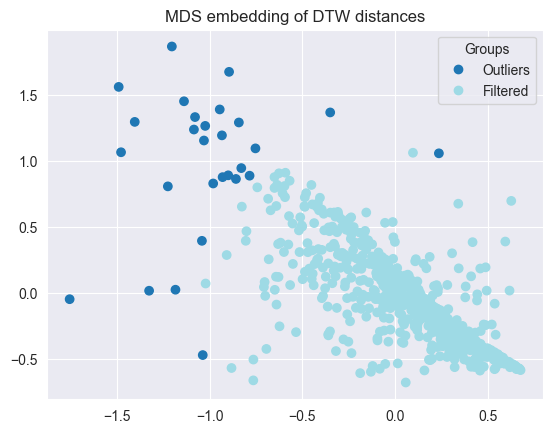

In [120]:
quick_mds(dist_matrix, df_nv['arc_type'].values,['Outliers','Filtered'])

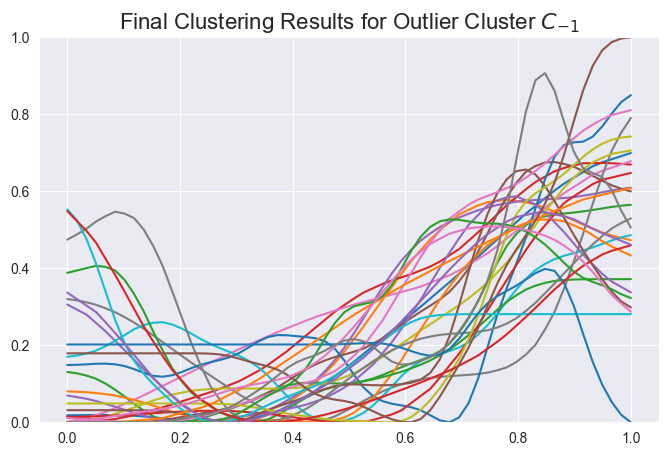

(28, 28)

In [121]:
outliers_df = df_nv[df_nv['arc_type'] == -1]
quick_arc_plot(outliers_df,r"Final Clustering Results for Outlier Cluster $C_{-1}$",16)
outliers_df.shape

In [122]:
threshold_increase = 0.05
df_c = df_nv[df_nv['arc_type'] == 0].copy()
df_c['arc_type'] = 0

In [123]:
filtered_df = df_c[df_c['arc_type'] == 0].copy()
filtered_df = filtered_df[filtered_df['increase'] < 0]
filtered_df['vertical_flip'] = filtered_df['vertical_flip'].apply(lambda y: -y)
filtered_df['y_sort_norm'] = filtered_df['y_sort_norm'].apply(lambda y: x_flip(y))
filtered_df = arc_features(filtered_df,'y_sort_norm')
filtered_df[['peaks_x','peaks_y','troughs_x','troughs_y']] = filtered_df['y_sort_norm'].apply(lambda y: pd.Series(quick_arc_peak(y,0.1)))

df_c.update(filtered_df)
filtered_df.shape

(56, 28)

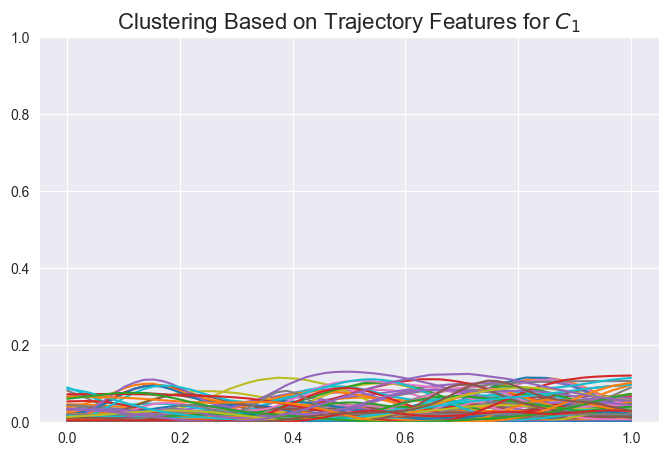

(96, 28)

In [124]:
filtered_df = df_c[df_c['arc_type'] == 0].copy()
filtered_df = filtered_df[filtered_df['increase'].apply(abs) <= threshold_increase]
filtered_df = filtered_df[filtered_df['peaks_x'].apply(len) == 0]
filtered_df = filtered_df[filtered_df['troughs_x'].apply(len) == 0]
filtered_df['arc_type'] = 1
df_c.update(filtered_df)
quick_arc_plot(filtered_df,rf"Clustering Based on Trajectory Features for $C_1$",16)
filtered_df.shape

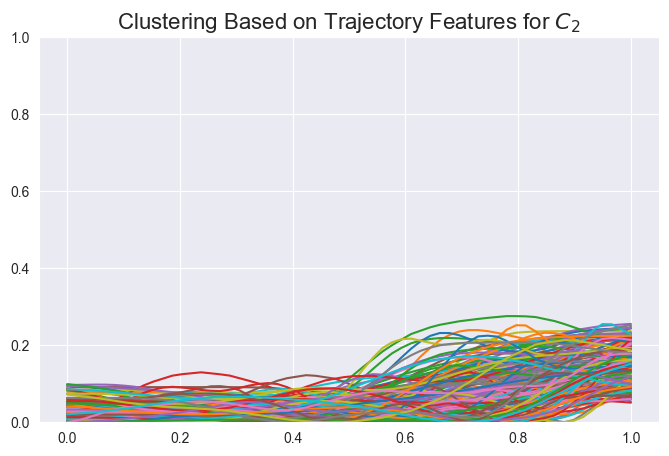

(180, 28)

In [125]:
filtered_df = df_c[df_c['arc_type'] == 0].copy()
filtered_df = filtered_df[filtered_df['increase'] > threshold_increase]
filtered_df = filtered_df[filtered_df['increase'] <= 0.2]
filtered_df = filtered_df[filtered_df['peaks_x'].apply(len) == 0]
filtered_df = filtered_df[filtered_df['troughs_x'].apply(len) == 0]
filtered_df['arc_type'] = 2
df_c.update(filtered_df)
quick_arc_plot(filtered_df,rf"Clustering Based on Trajectory Features for $C_2$",16)
filtered_df.shape

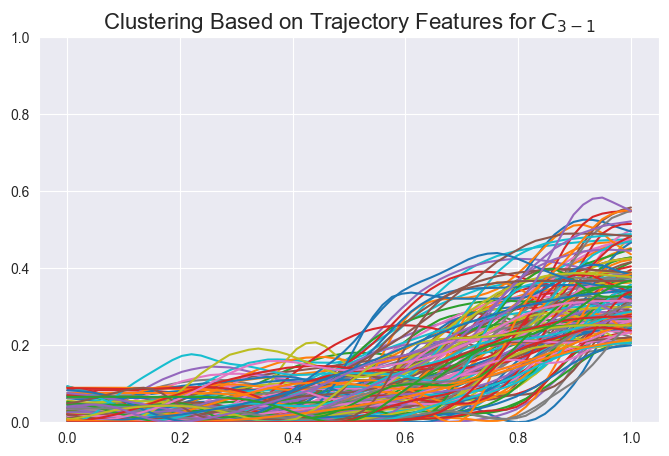

(135, 28)

In [126]:
filtered_df = df_c[df_c['arc_type'] == 0].copy()
filtered_df = filtered_df[filtered_df['increase'] > 0.2]
filtered_df = filtered_df[filtered_df['peaks_x'].apply(len) == 0]
filtered_df = filtered_df[filtered_df['troughs_x'].apply(len) == 0]
filtered_df['arc_type'] = 3
df_c.update(filtered_df)
quick_arc_plot(filtered_df,r"Clustering Based on Trajectory Features for $C_{3-1}$",16)
filtered_df.shape

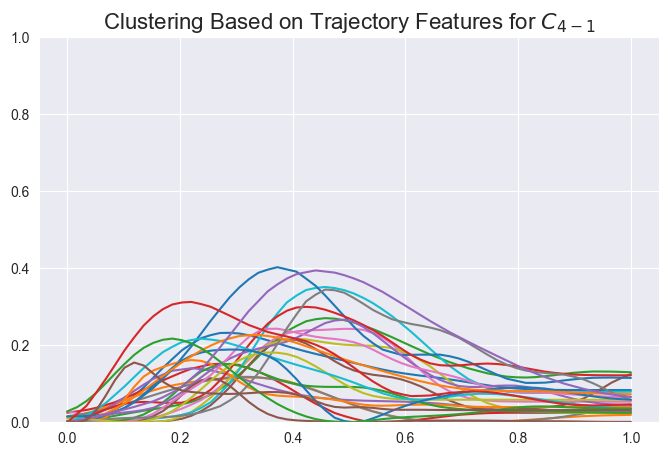

(26, 28)

In [127]:
filtered_df = df_c[df_c['arc_type'] == 0].copy()
filtered_df = filtered_df[filtered_df['peaks_x'].apply(len) > 0]
filtered_df = filtered_df[filtered_df['troughs_x'].apply(len) == 0]
filtered_df = filtered_df[filtered_df['peaks_x'] <= 0.5]

filtered_df['arc_type'] = 4
df_c.update(filtered_df)
quick_arc_plot(filtered_df,r"Clustering Based on Trajectory Features for $C_{4-1}$",16)
filtered_df.shape

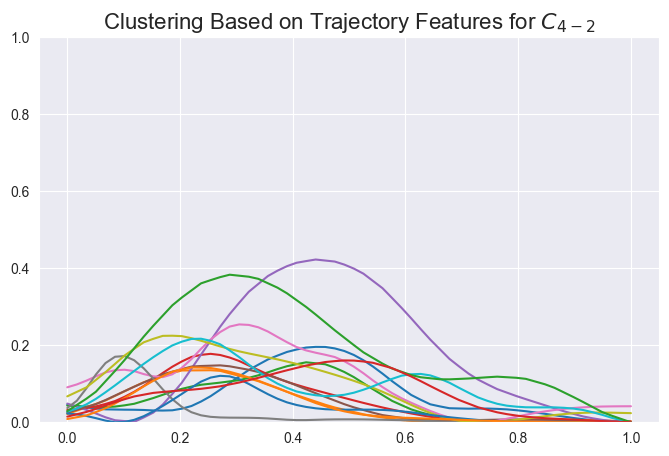

(14, 28)

In [128]:
filtered_df = df_c[df_c['arc_type'] == 0].copy()
filtered_df = filtered_df[filtered_df['increase'].apply(abs) <= threshold_increase]
filtered_df = filtered_df[filtered_df['peaks_x'].apply(len) > 0]
filtered_df = filtered_df[filtered_df['troughs_x'].apply(len) == 0]
filtered_df = filtered_df[filtered_df['peaks_x'] > 0.5]

filtered_df['horizontal_flip'] = filtered_df['horizontal_flip'].apply(lambda y: -y)
filtered_df['y_sort_norm'] = filtered_df['y_sort_norm'].apply(lambda y: x_flip(y))

filtered_df['arc_type'] = 4
df_c.update(filtered_df)
quick_arc_plot(filtered_df,r"Clustering Based on Trajectory Features for $C_{4-2}$",16)
filtered_df.shape

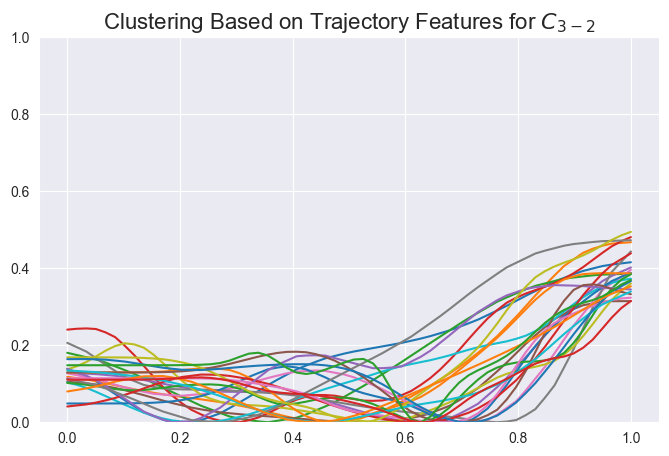

(24, 28)

In [129]:
filtered_df = df_c[df_c['arc_type'] == 0].copy()
filtered_df = filtered_df[filtered_df['peaks_x'].apply(len) == 0]
filtered_df = filtered_df[filtered_df['troughs_x'].apply(len) > 0]
filtered_df = filtered_df[filtered_df['increase'].apply(abs) >0.2]

filtered_df['arc_type'] = 3
df_c.update(filtered_df)
quick_arc_plot(filtered_df,r"Clustering Based on Trajectory Features for $C_{3-2}$",16)
filtered_df.shape

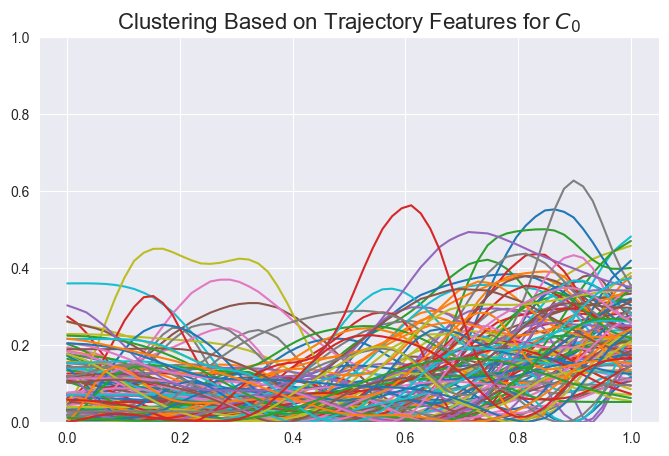

(114, 28)

In [130]:
filtered_df = df_c[df_c['arc_type'] == 0].copy()
quick_arc_plot(filtered_df,r"Clustering Based on Trajectory Features for $C_0$",16)
filtered_df.shape

In [131]:
df_test = df_c[df_c['arc_type'] > 0].copy()[['y_sort_norm', 'arc_type']]
y_list = df_test['y_sort_norm'].tolist()
df_test.shape

(475, 2)

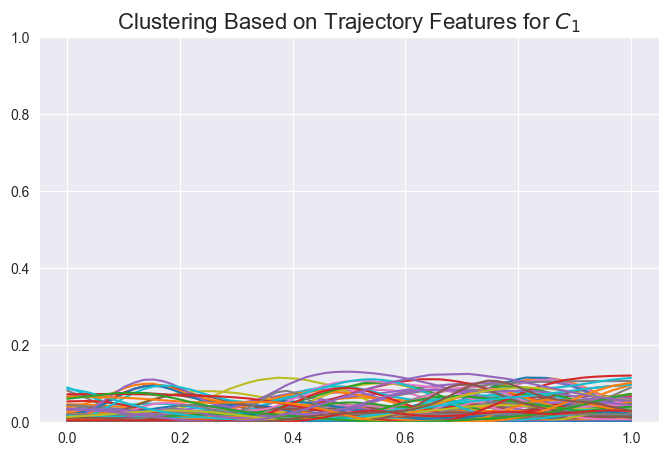

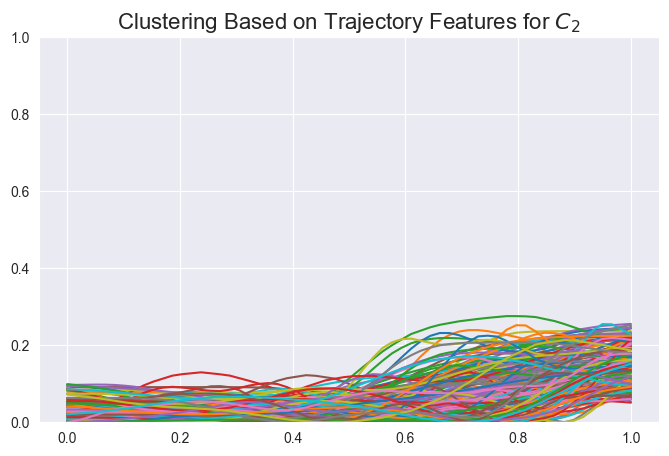

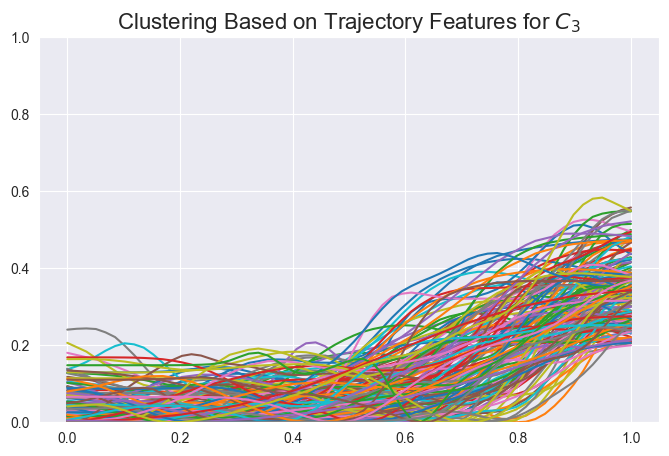

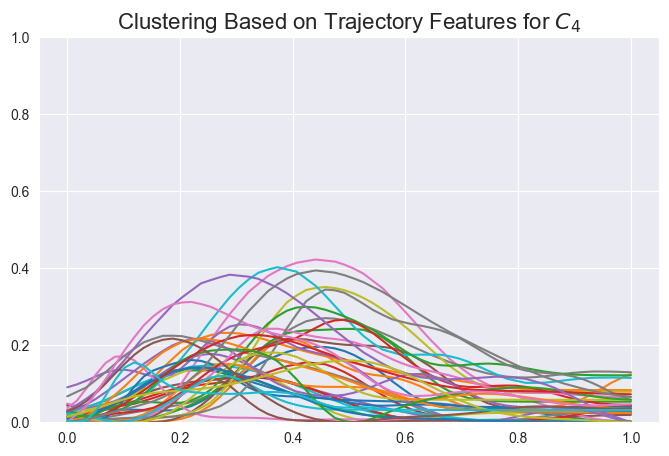

In [132]:
for name, group in df_test.groupby('arc_type'):
    quick_arc_plot(group,rf"Clustering Based on Trajectory Features for $C_{{{name}}}$",16)

In [133]:
from tslearn.metrics import cdist_dtw
import numpy as np
#
X = np.array(y_list, dtype=object)
dist_matrix_evaluate = cdist_dtw(X)

In [134]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

def quick_dtw_metrics(d_matrix, labels):

    n = len(labels)

    intra, inter = [], []
    for i in range(n):
        for j in range(i+1, n):
            if labels[i] == labels[j]:
                intra.append(d_matrix[i,j])
            else:
                inter.append(d_matrix[i,j])

    score = silhouette_score(d_matrix, labels, metric="precomputed")

    return np.mean(intra), np.mean(inter), score

In [135]:
def quick_CQC(matrix, df):
    labels = df["arc_type"].values
    mean_intra, mean_inter, score = quick_dtw_metrics(matrix, labels)
    CQC_list = [mean_intra, mean_inter, mean_inter / mean_intra,score]

    sil_samples = silhouette_samples(matrix, labels, metric="precomputed")
    df['silhouette'] = sil_samples
    CQC_list.extend(df.groupby('arc_type')['silhouette'].mean().tolist())
    return CQC_list

In [136]:
CQC_df = pd.DataFrame({'Feature Based Clustering': quick_CQC(dist_matrix_evaluate, df_test)})
CQC_df.index = ["Mean Intra Dist", "Mean Inter Dist", "SCR", "Silhouette Score",
                r"CSC: $C_1$",r"CSC: $C_2$", r"CSC: $C_3$", r"CSC: $C_4$"]

CQC_df

,Feature Based Clustering
Mean Intra Dist,0.276881
Mean Inter Dist,0.706896
SCR,2.553067
Silhouette Score,0.339738
CSC: $C_1$,0.499854
CSC: $C_2$,0.288280
CSC: $C_3$,0.346336
CSC: $C_4$,0.160793


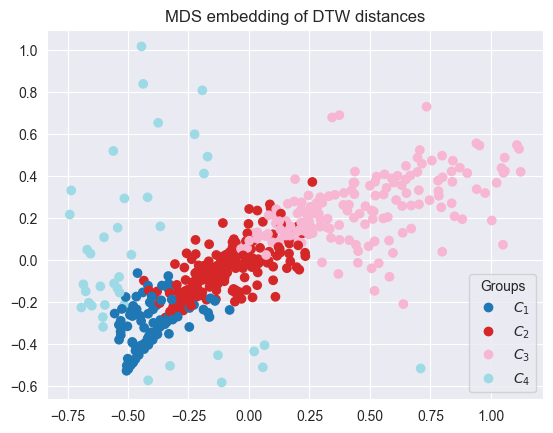

In [137]:
#
type_label = [r"$C_1$",r"$C_2$", r"$C_3$", r"$C_4$"]
quick_mds(dist_matrix_evaluate, labels, type_label)

In [138]:
import numpy as np
from dtaidistance import dtw
from collections import Counter

k = 3
classified = df_c[df_c['arc_type'] != 0]
unclassified = df_c[df_c['arc_type'] == 0]

for idx, row in unclassified.iterrows():
    y = row['y_sort_norm']
    distances = []
    for _, c_row in classified.iterrows():
        dist = dtw.distance(y, c_row['y_sort_norm'])
        distances.append((dist, c_row['arc_type']))

    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    majority_label = Counter(k_nearest).most_common(1)[0][0]
    df_c.at[idx, 'arc_type'] = majority_label

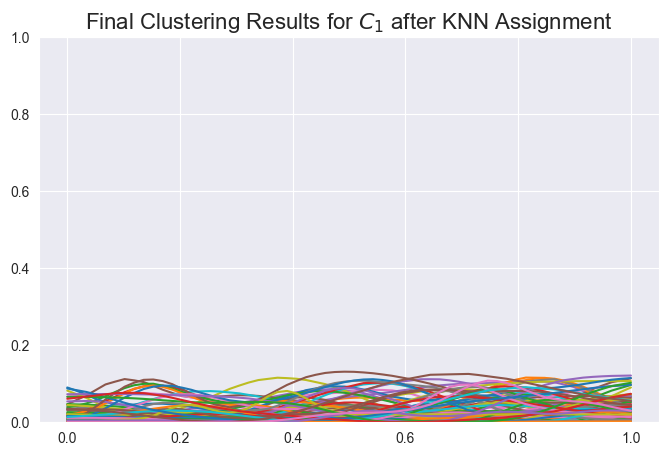

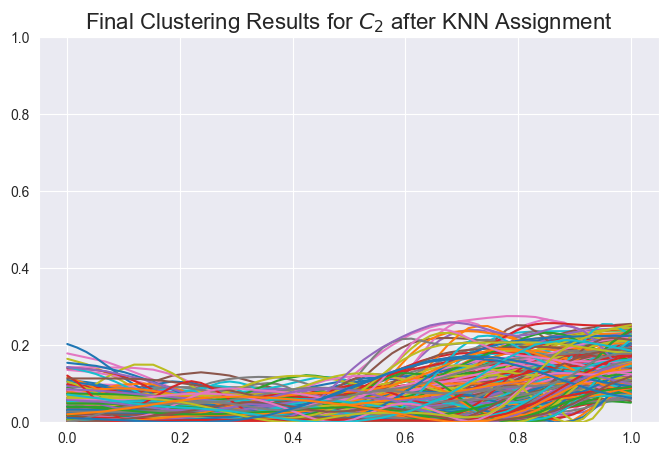

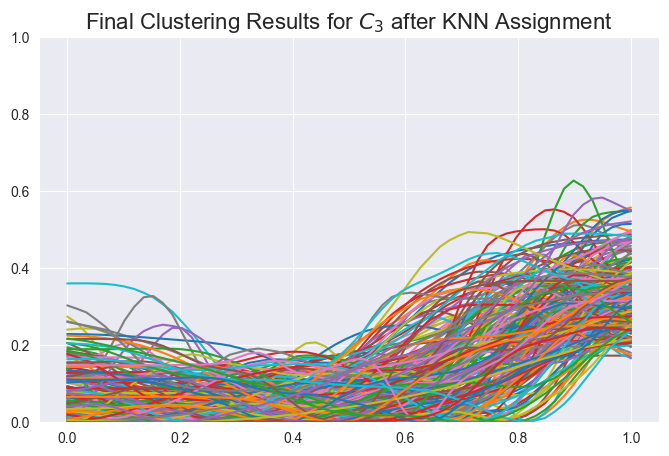

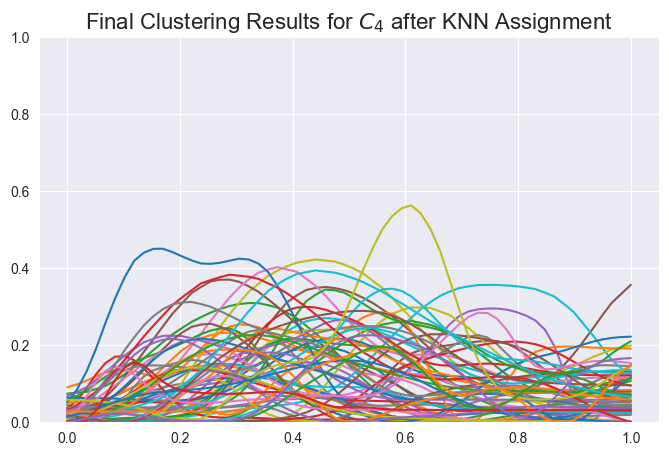

In [139]:
for name, group in df_c.groupby('arc_type'):
    quick_arc_plot(group, rf"Final Clustering Results for $C_{{{name}}}$ after KNN Assignment",16)

In [140]:
final_df = df_nv.copy()
final_df.update(df_c)
df_final_test = final_df[final_df['arc_type'] > 0].copy()[['y_sort_norm', 'arc_type']]
y_list = df_final_test['y_sort_norm'].tolist()
df_final_test.shape

(589, 2)

In [141]:

X = np.array(y_list, dtype=object)
dist_matrix_final = cdist_dtw(X)

In [142]:
CQC_df['After KNN'] = quick_CQC(dist_matrix_final, df_final_test)
CQC_df

,Feature Based Clustering,After KNN
Mean Intra Dist,0.276881,0.337674
Mean Inter Dist,0.706896,0.725259
SCR,2.553067,2.147806
Silhouette Score,0.339738,0.283790
CSC: $C_1$,0.499854,0.530583
CSC: $C_2$,0.288280,0.249088
CSC: $C_3$,0.346336,0.265867
CSC: $C_4$,0.160793,0.087961


In [145]:
def top_n_plot(top_df):
    #
    grouped = top_df.groupby(["arc_type", "horizontal_flip", "vertical_flip"]).size().reset_index(name="count")
    #
    fig, ax = plt.subplots(figsize=(10, 6))
    grouped["subgroup"] = grouped[["horizontal_flip", "vertical_flip"]].astype(str).agg("_".join, axis=1)
    pivot_df = grouped.pivot(index="arc_type", columns="subgroup", values="count").fillna(0)
    # stacked bar
    pivot_df.plot(kind="bar", stacked=True, ax=ax)
    plt.title("Top 100 stories by Story page hits")
    plt.ylabel("Count")
    plt.xlabel("Arc type")
    plt.legend(title="Flip [horizontal, vertical]")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

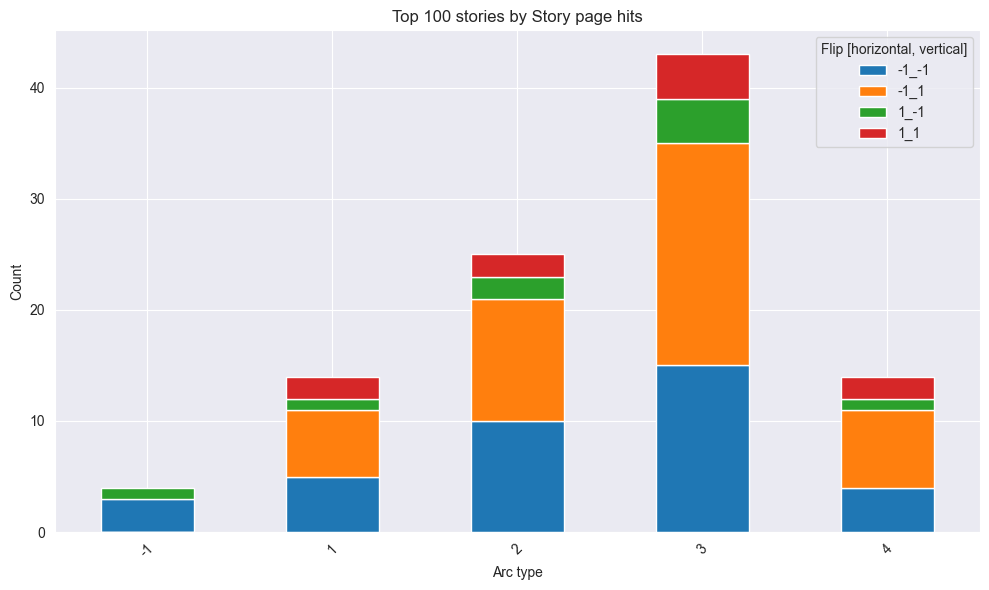

In [146]:
df_top100 = final_df.sort_values("Story page hits", ascending=False).head(100)
top_n_plot(df_top100)